In [3]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from tools import *

In [4]:
def py_coeff1(t, args):
    wr = args['wr']
    return np.exp(1j *wr*t)
def py_coeff2(t, args):
    wr = args['wr']
    return np.exp(-1j *wr*t)

# 单元测试 腔耗散

In [5]:
def get_cavity_test(wp,g=None,eps=None):
    # cavity
    Nc = 10
    Hc = 5.196
    kappa = 0.012
    # atom
    Na = 2
    eps = 0
    # couple
    g = 0.3
    # operator
    a = tensor(qeye(Na), destroy(Nc))
    ad = a.dag()
    sz = tensor(sigmaz(), qeye(Nc))
    sx = tensor(sigmax(), qeye(Nc))
    sm = tensor(create(Na), qeye(Nc))
    # collapse operator
    c_ops= []
    # c_ops.append(np.sqrt(0.1) * sm)
    c_ops.append(np.sqrt((1+0.09)*kappa) * a)
    c_ops.append(np.sqrt((0.09)*kappa) * ad)
    # Hamiltonian
    Hc = Hc*ad*a
    Ha = eps*sz + 1*sx
    Hi = 0*g*(sm*ad+sm.dag()*a)
    # tranformation for qubit
    w,v = eigh(Ha)
    H0 = Hc + Ha + Hi
    # probe
    Hp1 =  [np.sqrt(0.0001)*(ad), py_coeff2]
    Hp2 =  [np.sqrt(0.0001)*(a), py_coeff1]
    H = [H0,Hp1,Hp2]
    # solve
    psi0 = tensor(basis(Na,0),fock(Nc,3))
    time = np.linspace(0,1000,1000)
    res = mesolve(H,psi0,time,c_ops,[a,ad*a],args={'wr': wp})
    aexpt = abs(res.expect[0][-1])

    # plt.plot(time,abs(res.expect[0]))
    # plt.plot(time,abs(res.expect[1]))
    return aexpt**2

In [8]:
probe_lis = np.linspace(5.1,5.3,10)
res_lis = []
for probe in probe_lis:
    a = parfor(get_cavity_test, probe_lis, g=0,eps=0)
res_lis = np.abs(a)
plt.plot(probe_lis,res_lis,c='r');

: 

# 单元测试 原子耗散

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[-7.07106781e-01 -5.55111512e-17]
 [-5.55111512e-17  7.07106781e-01]]
0.8044296825069537
0.8044296825069569


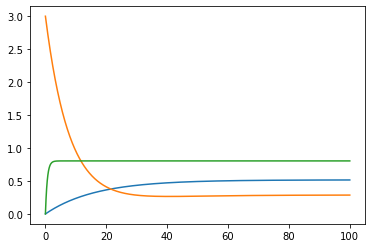

In [5]:
# def get_atom_test(wp,g=None,eps=None):
# cavity
Nc = 10
Hc = 2
wp = 2
# atom
Na = 2
eps = 0.5
t2 = 0.5
# couple
g = 0.3
# operator
a = tensor(qeye(Na), destroy(Nc))
ad = a.dag()
sz = tensor(sigmaz(), qeye(Nc))
sx = tensor(sigmax(), qeye(Nc))
sm = tensor(create(Na), qeye(Nc))
# collapse operator
c_ops= []
# c_ops.append(np.sqrt(0.1) * sm)
c_ops.append(np.sqrt((1+0.25)*0.1) * a)
c_ops.append(np.sqrt((0.25))*0.1 * ad)
# Hamiltonian
Hc = Hc*ad*a
Ha = eps*sz + 1*sx
Hi = 0*g*(sm*ad+sm.dag()*a)
# tranformation for qubit
Ha0 = eps*sigmaz() + t2*sigmax()
w,v = eigh(Ha0)
Ha1 = np.transpose(np.conj(v))@np.array(Ha0)@v
Ha1 = Qobj(Ha1)
print(Ha1)
c_ops2 = []
add_heat(Ha1,Na,c_ops2)
for each in c_ops2:
    c_ops.append(tensor(each, qeye(Nc)))
Ha1 = tensor(Ha1,qeye(Nc))
# all Hamiltonian
H0 = Hc + Ha1 + Hi
# probe
Hp1 =  [np.sqrt(0.001)*(ad), py_coeff2]
Hp2 =  [np.sqrt(0.001)*(a), py_coeff1]
H = [H0,Hp1,Hp2]
# solve
psi0 = tensor(basis(Na,1),fock(Nc,3))
time = np.linspace(0,100,1000)
res = mesolve(H,psi0,time,c_ops,[a,ad*a,tensor(qdiags([1,0],0),qeye(Nc))],args={'wr': wp})
aexpt = abs(res.expect[0][-1])

plt.plot(time,abs(res.expect[0]))
plt.plot(time,abs(res.expect[1]))
plt.plot(time,(res.expect[2]))
print(res.expect[2][-1])
total = 1+np.exp(-np.sqrt(2))
zhanju1 = np.exp(0)/total
print(zhanju1)
    # return aexpt**2

# 单元测试 腔加qubit

0.8044296825069569
0.3583162289684746


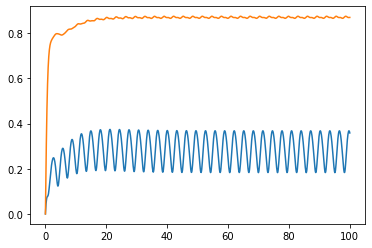

In [12]:

# cavity
Nc = 10
Hc = 2
wp = 2
# atom
Na = 2
eps = 0
t2 = 1
# couple
g = 0.5
# operator
a = tensor(qeye(Na), destroy(Nc))
ad = a.dag()
sz = tensor(sigmaz(), qeye(Nc))
sx = tensor(sigmax(), qeye(Nc))
sm = tensor(create(Na), qeye(Nc))
# collapse operator
c_ops= []
# c_ops.append(np.sqrt(0.1) * sm)
c_ops.append(np.sqrt((1+0.25)*0.1) * a)
c_ops.append(np.sqrt((0.25))*0.1 * ad)
# Hamiltonian
Hc = Hc*ad*a
Ha = eps*sz + t2*sx
Hi = 1*g*(sm*ad+sm.dag()*a)
# tranformation for qubit
Ha0 = eps*sigmaz() + t2*sigmax()
w,v = eigh(Ha0)
Ha1 = np.transpose(np.conj(v))@np.array(Ha0)@v
Ha1 = Qobj(Ha1)
sigmam1 = np.transpose(np.conj(v))@np.array(sigmap())@v
sigmam1 = Qobj(sigmam1)
sm1 = tensor(sigmam1,qeye(Nc))
Hi1 = 1*g*(sm1*ad+sm1.dag()*a)
c_ops2 = []
add_heat(Ha1,Na,c_ops2)
for each in c_ops2:
    c_ops.append(tensor(each, qeye(Nc)))
Ha1 = tensor(Ha1,qeye(Nc))
# all Hamiltonian
H0 = Hc + Ha1 + Hi1
# probe
Hp1 =  [np.sqrt(0.001)*(ad), py_coeff2]
Hp2 =  [np.sqrt(0.001)*(a), py_coeff1]
H = [H0,Hp1,Hp2]
# solve
psi0 = tensor(basis(Na,1),fock(Nc,3))
time = np.linspace(0,100,1000)
res = mesolve(H,psi0,time,c_ops,[a,ad*a,tensor(qdiags([1,0],0),qeye(Nc))],args={'wr': wp})
aexpt = abs(res.expect[0][-1])
plt.plot(time,abs(res.expect[0]))
# plt.plot(time,abs(res.expect[1]))
plt.plot(time,(res.expect[2]))
# print(res.expect[2][-100:-1])
total = 1+np.exp(-np.sqrt(2))
zhanju1 = np.exp(0)/total
print(zhanju1)
print(aexpt)


In [7]:
print(sigmam())

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 0.]
 [1. 0.]]


In [23]:
def get_couple_test(wp,g=None,eps=None):
    # cavity
    Nc = 10
    Hc = 5.196
    kappa = 0.012
    # wp = 2
    # atom
    Na = 2
    # eps = 0.5
    t2 = 5.2
    # couple
    # g = 0.3
    # operator
    a = tensor(qeye(Na), destroy(Nc))
    ad = a.dag()
    sz = tensor(sigmaz(), qeye(Nc))
    sx = tensor(sigmax(), qeye(Nc))
    sm = tensor(create(Na), qeye(Nc))
    # collapse operator
    c_ops= []
    # c_ops.append(np.sqrt(0.1) * sm)
    c_ops.append(np.sqrt((1+0)*kappa) * a)
    c_ops.append(np.sqrt((0)*kappa) * ad)
    # Hamiltonian
    Hc = Hc*ad*a
    Ha = eps/2*sz + t2/2*sx
    Hi = 1*g*(sm*ad+sm.dag()*a)
    # tranformation for qubit
    Ha0 = eps/2*sigmaz() + t2/2*sigmax()
    w,v = eigh(Ha0)
    Ha1 = np.transpose(np.conj(v))@np.array(Ha0)@v
    Ha1 = Qobj(Ha1)
    if eps<0:
        tmp_sm = sigmap()
    else:
        tmp_sm = sigmam()
    sigmam1 = np.transpose(np.conj(v))@np.array(tmp_sm)@v
    sigmam1 = Qobj(sigmam1)
    sm1 = tensor(sigmam1,qeye(Nc))
    Hi1 = 1*g*(sm1*ad+sm1.dag()*a)
    c_ops2 = []
    add_heat(Ha1,Na,c_ops2)
    for each in c_ops2:
        c_ops.append(tensor(each, qeye(Nc)))
    Ha1 = tensor(Ha1,qeye(Nc))
    # all Hamiltonian
    H0 = Hc + Ha1 + Hi1
    # probe
    Hp1 =  [np.sqrt(0.0001)*(ad), py_coeff2]
    Hp2 =  [np.sqrt(0.0001)*(a), py_coeff1]
    H = [H0,Hp1,Hp2]
    # solve
    psi0 = tensor(basis(Na,1),fock(Nc,3))
    time = np.linspace(0,100,1000)
    res = mesolve(H,psi0,time,c_ops,[a,ad*a,tensor(qdiags([1,0],0),qeye(Nc))],args={'wr': wp})
    aexpt = abs(res.expect[0][-500:-1])
    # plt.plot(time,abs(res.expect[0]))
    # plt.plot(time,abs(res.expect[1]))
    # plt.plot(time,(res.expect[2]))
    # print(res.expect[2][-1])
    # total = 1+np.exp(-np.sqrt(2))
    # zhanju1 = np.exp(0)/total
    # print(zhanju1)
    ret = np.sum(aexpt)/len(aexpt)
    return ret**2

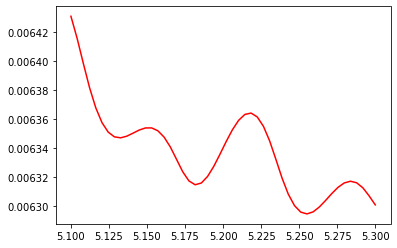

In [24]:
probe_lis = np.linspace(5.1,5.3,50)
res_lis = []
for probe in probe_lis:
    res_lis.append(get_couple_test(probe,g=0.8,eps=0))
res_lis = np.abs(res_li
plt.plot(probe_lis,res_lis,c='r');

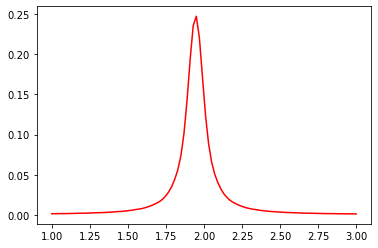

In [10]:
probe_lis = np.linspace(1,3,100)
res_lis = []
for probe in probe_lis:
    res_lis.append(get_couple_test(probe,g=1,eps=-10))
res_lis = np.abs(res_lis)
plt.plot(probe_lis,res_lis,c='r');

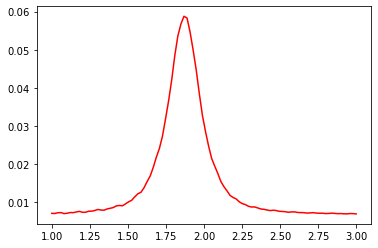

In [9]:
probe_lis = np.linspace(1,3,100)
res_lis = []
for probe in probe_lis:
    res_lis.append(get_couple_test(probe,g=0.5,eps=-1))
res_lis = np.abs(res_lis)
plt.plot(probe_lis,res_lis,c='r');

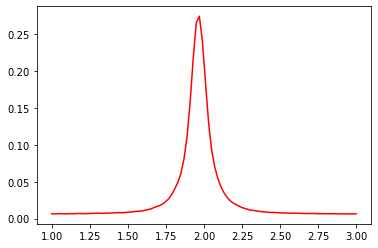

In [10]:
probe_lis = np.linspace(1,3,100)
res_lis = []
for probe in probe_lis:
    res_lis.append(get_couple_test(probe,g=0.5,eps=1))
res_lis = np.abs(res_lis)
plt.plot(probe_lis,res_lis,c='r');

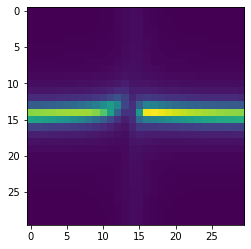

In [6]:
N1 = 1
N2 = 1
probe_lis = np.linspace(1,3,N1)
eps_lis = np.linspace(-10,10,N2)
res_lis = np.zeros((N1,N2))
for i,eps in enumerate(eps_lis):
    for j,probe in enumerate(probe_lis):
        res_lis[j,i]=get_couple_test(probe,g=0.5,eps=eps)
res_lis = np.abs(res_lis)
plt.imshow(res_lis)